# Extra

Usaremos los datos tick a tick del IVE (S&P 500 Value Index) que os descargasteis de Drive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Carga el dataset, explóralo y da estructura correspondiente a los datos. El nombre de las columnas es el siguiente

**['date', 'time', 'price', 'bid', 'ask', 'volume']**

Cargamos los datos sin header, seleccionamos un subconjunto y renombramos las columnas

In [2]:
sp = pd.read_csv("IVE_tickbidask.txt", header=None) \
       .iloc[:, :]

In [3]:
sp.head()

,0,1,2,3,4,5
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [4]:
sp.columns = ['date', 'time', 'price', 'bid', 'ask', 'volume']

In [5]:
sp.head()

,date,time,price,bid,ask,volume
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


Estudiamos la estructura de los datos

In [6]:
sp.shape

(6860940, 6)

In [7]:
sp.head()

,date,time,price,bid,ask,volume
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [8]:
sp.tail()

,date,time,price,bid,ask,volume
6860935,06/14/2019,15:59:58,114.75,114.73,114.76,100
6860936,06/14/2019,16:00:00,114.77,114.73,114.77,628
6860937,06/14/2019,16:10:00,114.77,114.63,114.90,0
6860938,06/14/2019,18:30:00,114.77,112.64,116.67,0
6860939,06/14/2019,20:00:00,114.77,112.64,116.67,0


Miramos el formato de las columnas

In [9]:
sp.dtypes

date       object
time       object
price     float64
bid       float64
ask       float64
volume      int64
dtype: object

Las columnas 'price', 'bid', 'ask' y 'volume' tienen el formato correcto, no así 'date' y 'time'. Así que realizamos lo siguiente

- Cambiamos el formato de la fecha de 'string' a 'datetime'
- La ponemos como índice del dataframe
- Borramos las columnas 'date' y 'time'
- El cambio de índice tarda alrededor de 30 segundos con el subconjunto de datos que hemos cogido.

In [6]:
from datetime import datetime
from datetime import timedelta

In [7]:
sp.head()

,0,1,2,3,4,5
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [8]:
sp.index = (sp.date +" "+ sp.time)

AttributeError: 'DataFrame' object has no attribute 'date'

In [9]:
sp.head()

,0,1,2,3,4,5
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [4]:
sp.index.is_unique

True

In [5]:
sp.index = pd.to_datetime(sp.index, format="%m/%d/%Y %H:%M:%S")

ValueError: time data '0' does not match format '%m/%d/%Y %H:%M:%S' (match)

In [16]:
sp.head()

,date,time,price,bid,ask,volume
2009-09-28 09:30:00,09/28/2009,09:30:00,50.79,50.70,50.79,100
2009-09-28 09:30:00,09/28/2009,09:30:00,50.71,50.70,50.79,638
2009-09-28 09:31:32,09/28/2009,09:31:32,50.75,50.75,50.76,100
2009-09-28 09:31:32,09/28/2009,09:31:32,50.75,50.75,50.76,100
2009-09-28 09:31:33,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [17]:
sp.index = (sp.date +" "+ sp.time)
sp.index = pd.to_datetime(sp.index, format="%m/%d/%Y %H:%M:%S")

print(f'Formato del índice -> {sp.index.dtype}')

sp.drop(columns=['date', 'time'], inplace=True)

sp.head()

Formato del índice -> datetime64[ns]


,price,bid,ask,volume
2009-09-28 09:30:00,50.79,50.70,50.79,100
2009-09-28 09:30:00,50.71,50.70,50.79,638
2009-09-28 09:31:32,50.75,50.75,50.76,100
2009-09-28 09:31:32,50.75,50.75,50.76,100
2009-09-28 09:31:33,50.75,50.75,50.76,100


- Estudia estadísticas básicas para detectar outliers

In [18]:
sp.describe().round(3)

,price,bid,ask,volume
count,6860940.000,6860940.000,6860940.000,6860940.000
mean,88.710,88.702,88.716,253.852
std,19.536,19.538,19.535,3240.033
min,0.110,0.000,0.000,0.000
25%,75.110,75.110,75.120,100.000
50%,91.500,91.490,91.500,100.000
75%,105.280,105.280,105.290,200.000
max,121.120,121.120,123.000,2600000.000


Observamos que el mínimo del precio y el bid es de 0.11 y 0.10 respectivamente. Buscamos la fecha.

In [19]:
sp.price.idxmin()

Timestamp('2010-05-06 14:49:07')

El 6 de mayo de 2010 se produjo el [flash crash de 2010](https://es.wikipedia.org/wiki/Flash_Crash_de_2010). Diez minutos antes de las 15:00 los mayores índices de USA cayeron cerca de un 10% en cuestión de minutos. El mínimo que observamos en los datos representa una caída casi del 100%. Los datos que estamos analizando son los ticks de un ETF sobre el S&P (no el S&P en sí). Probablemente la demanda del ETF prácticamente desapareció causando negociaciones extremas (algún insensato con órdenes de venta a mercado o algún que otro stop-loss).

Por lo que en principio estos datos son correctos y no debemos corregirlos.

- Haz un plot cerca del suceso outlier

In [20]:
import matplotlib.dates as mdates

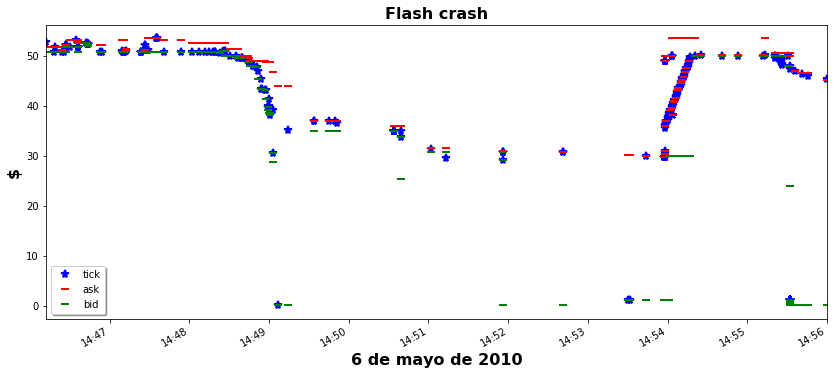

In [21]:
idx = (sp.index - sp.price.idxmin() > -timedelta(minutes=3)) \
        & (sp.index - sp.price.idxmin() < timedelta(minutes=7))

ax = sp[['price', 'ask', 'bid']].loc[idx] \
                                .plot(style=['*b', '_r', '_g'],
                                      figsize=(14, 6),
                                      ms=8,
                                      mew=2)
formato = {'weight': 'bold', 'fontsize': 16}
ax.set_title('Flash crash', **formato)
ax.set_xlabel('6 de mayo de 2010', **formato)
ax.set_ylabel('$', **formato)
ax.legend(['tick', 'ask', 'bid'], shadow=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

- Tira las columnas 'bid' y 'ask', y selecciona los datos a partir del 1 de Enero de 2011.

In [22]:
sp.drop(columns=['bid', 'ask'], inplace=True)

idx = sp.index >= datetime(2011, 1, 1)

sp = sp.loc[idx, :]

sp.head()

,price,volume
2011-01-03 09:30:00,60.02,100
2011-01-03 09:30:00,60.12,465
2011-01-03 09:30:01,60.01,162
2011-01-03 09:30:09,60.13,520
2011-01-03 09:30:09,60.06,100


In [23]:
sp.resample('1y').min()

,price,volume
2011-12-31,48.73,100
2012-12-31,57.66,0
2013-12-31,67.18,0
2014-12-31,80.00,0
2015-12-31,72.55,0
2016-12-31,78.41,0
2017-12-31,100.97,0
2018-12-31,94.72,0
2019-12-31,98.97,0


- Calcula las velas diarias, mensuales y anuales del precio (ohlc).

In [24]:
sp.price.resample('1D').ohlc().head(20)

,open,high,low,close
2011-01-03,60.02,60.5300,60.0100,60.3200
2011-01-04,60.32,60.5000,60.0138,60.4400
2011-01-05,59.79,60.8000,59.7900,60.7300
2011-01-06,60.77,60.8240,60.4200,60.5893
2011-01-07,60.73,60.7900,59.9600,60.4300
2011-01-08,NaN,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN,NaN
2011-01-10,60.06,60.4100,59.9700,60.3300
2011-01-11,60.58,60.7699,60.3540,60.6000
2011-01-12,61.00,61.3100,60.9140,61.2200


Quitamos los "NaN" que aparecen por los fines de semana en las velas diarias

In [25]:
sp.price.resample('1D').ohlc().dropna()

,open,high,low,close
2011-01-03,60.02,60.5300,60.0100,60.3200
2011-01-04,60.32,60.5000,60.0138,60.4400
2011-01-05,59.79,60.8000,59.7900,60.7300
2011-01-06,60.77,60.8240,60.4200,60.5893
2011-01-07,60.73,60.7900,59.9600,60.4300
...,...,...,...,...
2019-06-10,113.00,115.1700,113.0000,114.4400
2019-06-11,115.17,115.3351,114.4000,114.6100
2019-06-12,114.52,114.7000,114.0950,114.2100
2019-06-13,114.63,115.0700,114.5569,114.9700


In [26]:
sp.price.resample('B').ohlc()

,open,high,low,close
2011-01-03,60.02,60.5300,60.0100,60.3200
2011-01-04,60.32,60.5000,60.0138,60.4400
2011-01-05,59.79,60.8000,59.7900,60.7300
2011-01-06,60.77,60.8240,60.4200,60.5893
2011-01-07,60.73,60.7900,59.9600,60.4300
...,...,...,...,...
2019-06-10,113.00,115.1700,113.0000,114.4400
2019-06-11,115.17,115.3351,114.4000,114.6100
2019-06-12,114.52,114.7000,114.0950,114.2100
2019-06-13,114.63,115.0700,114.5569,114.9700


Sigue habiendo NaN

In [27]:
sp.price.resample('B').ohlc().isnull().any()

open     True
high     True
low      True
close    True
dtype: bool

In [28]:
daily_candles = sp.price.resample('B').ohlc().dropna()
weekly_candles = sp.price.resample('1W').ohlc()
monthly_candles = sp.price.resample('1M').ohlc()

- Define una función que devuelva un dataframe en el que sólo se muestren negociaciones cada 1.000.000 de euros negociados.

In [31]:
def cash_ohlc(df, cash=1e5):
    '''
    Devuelve un 'df' con ohlc de las negociaciones divididas
    por efectivo negociado 'cash'.
    Ademas, se agrega al 'df' el efectivo acumulado.

    Inputs:
    ---------------
    df: pd.Dataframe
        Pandas dataframe con el precio y volumen de cada negociacion
    cash: float or int, optional
        Efectivo acumulado que nos interesa para el muestreo

    Returns:
    ---------------
    df_cash: pd.Dataframe
        Dataframe con ohlc de las negociaciones divididas
        por efectivo negociado 'cash'.
    '''
    assert 'price' in df.columns, 'no price in input'
    assert 'volume' in df.columns, 'no volume in input'

    df['cash_cum'] = (df.volume * df.price).cumsum()
    df['aux'] = np.floor(df.cash_cum/cash)
    df['date'] = df.index

    tmp = df.groupby(df.aux)

    df_cash = pd.DataFrame()
    df_cash['open'] = tmp.price.first()
    df_cash['high'] = tmp.price.max()
    df_cash['low'] = tmp.price.min()
    df_cash['close'] = tmp.price.last()
    df_cash['cash_cum'] = tmp.cash_cum.last()
    df_cash.index = tmp.date.last()

    return df_cash

In [32]:
cash_candles = cash_ohlc(sp, 1e6)
cash_candles.head()

,open,high,low,close,cash_cum
date,,,,,
2011-01-03 09:35:13,60.020,60.1300,60.010,60.1300,9.834440e+05
2011-01-03 09:43:13,60.130,60.1700,60.090,60.1700,1.988394e+06
2011-01-03 09:55:10,60.170,60.2500,60.150,60.2500,2.954548e+06
2011-01-03 10:11:26,60.267,60.2670,60.212,60.2500,3.928593e+06
2011-01-03 10:11:37,60.250,60.2524,60.250,60.2524,4.994415e+06


Podemos pintar el close por ejemplo

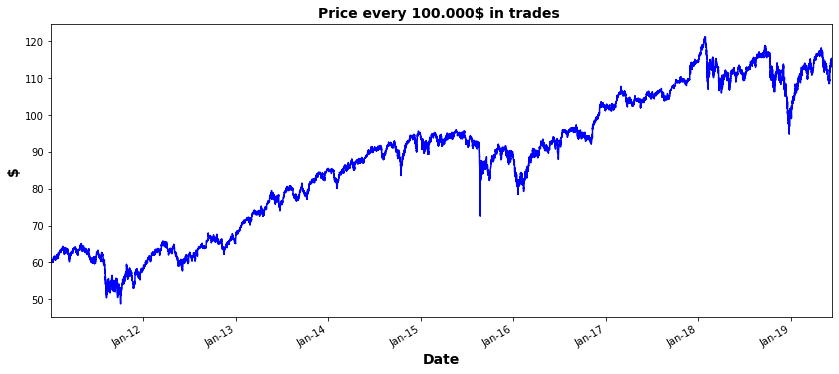

In [33]:
ax = cash_candles.close.plot(color='b', figsize=(14, 6))
formato = {'weight': 'bold', 'fontsize': 14}
ax.set_title('Price every 100.000$ in trades ', **formato)
ax.set_xlabel('Date', **formato)
ax.set_ylabel('$', **formato)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

- Calcula los retornos de las velas diarias y cada 1.000.000 de euros negociados.

In [34]:
def returns_pct(df, ref='close'):
    '''
    Devuelve el 'df' de entrada agregando los retornos diarios,
    y elimina la primera fila.

    Inputs:
    ---------------
    df: pd.Dataframe
        Pandas dataframe con un precio de referencia 'ref'

    Returns:
    ---------------
    df_returns: pd.Dataframe
        Dataframe con los retornos diarios ademas de las columnas de entrada

    '''
    assert ref in df.columns, f'no {ref} in input'

    df['returns'] = df[ref].pct_change() * 100
    df = df.dropna()

    return df

In [36]:
daily_candles = returns_pct(daily_candles)
cash_candles = returns_pct(cash_candles)

In [37]:
daily_candles.head()

,open,high,low,close,returns
2011-01-05,59.79,60.8000,59.790,60.7300,0.479815
2011-01-06,60.77,60.8240,60.420,60.5893,-0.231681
2011-01-07,60.73,60.7900,59.960,60.4300,-0.262918
2011-01-10,60.06,60.4100,59.970,60.3300,-0.165481
2011-01-11,60.58,60.7699,60.354,60.6000,0.447539


In [38]:
cash_candles.head()

,open,high,low,close,cash_cum,returns
date,,,,,,
2011-01-03 09:55:10,60.1700,60.2500,60.1500,60.2500,2.954548e+06,0.132957
2011-01-03 10:11:26,60.2670,60.2670,60.2120,60.2500,3.928593e+06,0.000000
2011-01-03 10:11:37,60.2500,60.2524,60.2500,60.2524,4.994415e+06,0.003983
2011-01-03 10:30:10,60.2561,60.3300,60.2560,60.3190,5.995420e+06,0.110535
2011-01-03 10:40:40,60.3090,60.3200,60.2865,60.3200,6.979832e+06,0.001658


- Haz un plot de las distribución de los retornos.

In [39]:
import seaborn as sns

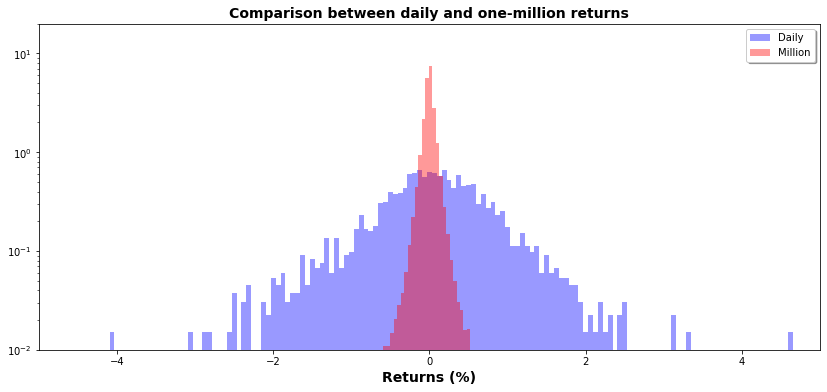

In [40]:
fig, ax = plt.subplots(1, figsize=(14, 6))

sns.distplot(daily_candles.returns,
             label='Daily',
             kde=False,
             norm_hist=True,
             bins=200,
             color='b',
             ax=ax)
sns.distplot(cash_candles.returns,
             label='Million',
             kde=False,
             norm_hist=True,
             bins=500,
             color='r')

ax.set_yscale('log')
plt.xlim(-5, 5)
plt.ylim(0.01, 20)

formato = {'weight': 'bold', 'fontsize': 14}
plt.xlabel('Returns (%)', **formato)
plt.title('Comparison between daily and one-million returns', **formato)
plt.legend(shadow=True)

Se observa que los retornos calculados por cada millón de dólares negociado tienen una distribución más estrecha que los retornos diarios.

- Con los precios muestreados calcula las [bandas de bollinger](https://es.wikipedia.org/wiki/Bandas_de_Bollinger).

In [43]:
def bollinger(df, K=2, window=20, ref='close'):
    '''
    Agrega al df las bandas de Bollinger inferior y superior
    ademas de la media movil correspondiente calculadas
    con el precio de referencia 'ref'.

    Inputs:
    ---------------
    df: pd.Dataframe
        Pandas dataframe con un precio de referencia 'ref'
    K: float or int, optional
        Semianchura de las bandas de Bollinger medida
        en relacion a la desviacion estandar
    window: float or int, optional
        Tamaño de la ventana para calcular la media y
        desviacion estandar moviles.

    Returns:
    ---------------
    df_bollinger: pd.Dataframe
        Dataframe de entrada con tres nuevas columnas:
        'boll_inf', 'boll_mean', 'boll_sup'.
    '''
    assert ref in df.columns, f'no {ref} in input'

    mean = df[ref].rolling(window).mean()
    sigma = df[ref].rolling(window).std()

    df['boll_inf'] = mean - K * sigma
    df['boll_mean'] = mean
    df['boll_sup'] = mean + K * sigma

    return df

In [44]:
bollinger(cash_candles).head(30)

,open,high,low,close,cash_cum,returns,boll_inf,boll_mean,boll_sup
date,,,,,,,,,
2011-01-03 09:55:10,60.1700,60.2500,60.1500,60.2500,2.954548e+06,0.132957,NaN,NaN,NaN
2011-01-03 10:11:26,60.2670,60.2670,60.2120,60.2500,3.928593e+06,0.000000,NaN,NaN,NaN
2011-01-03 10:11:37,60.2500,60.2524,60.2500,60.2524,4.994415e+06,0.003983,NaN,NaN,NaN
2011-01-03 10:30:10,60.2561,60.3300,60.2560,60.3190,5.995420e+06,0.110535,NaN,NaN,NaN
2011-01-03 10:40:40,60.3090,60.3200,60.2865,60.3200,6.979832e+06,0.001658,NaN,NaN,NaN
2011-01-03 11:00:09,60.3200,60.4200,60.3200,60.4100,7.999683e+06,0.149204,NaN,NaN,NaN
2011-01-03 11:10:21,60.4000,60.4199,60.3900,60.4100,8.864605e+06,0.000000,NaN,NaN,NaN
2011-01-03 11:33:38,60.4099,60.4390,60.3900,60.4300,9.939608e+06,0.033107,NaN,NaN,NaN
2011-01-03 11:40:01,60.4300,60.5100,60.4300,60.4900,1.099749e+07,0.099288,NaN,NaN,NaN


- Haz un plot donde muestres las bandas de Bollinger junto con le precio.

In [45]:
cash_candles = bollinger(cash_ohlc(sp, 1e8))
daily_candles = bollinger(daily_candles)
weekly_candles = bollinger(weekly_candles)
monthly_candles = bollinger(monthly_candles)

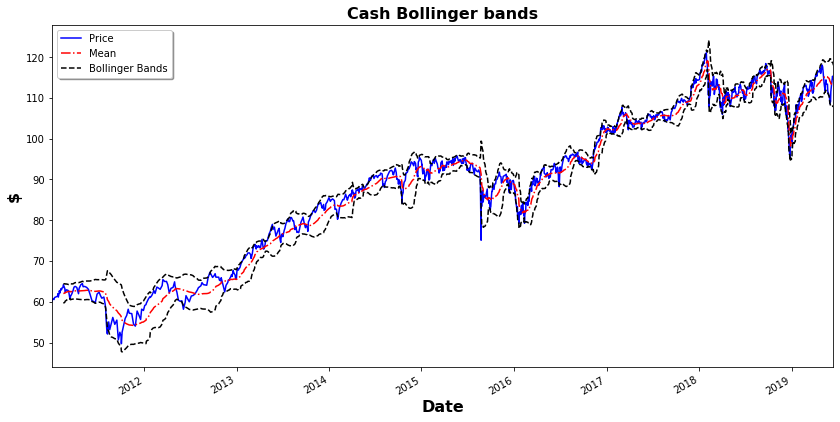

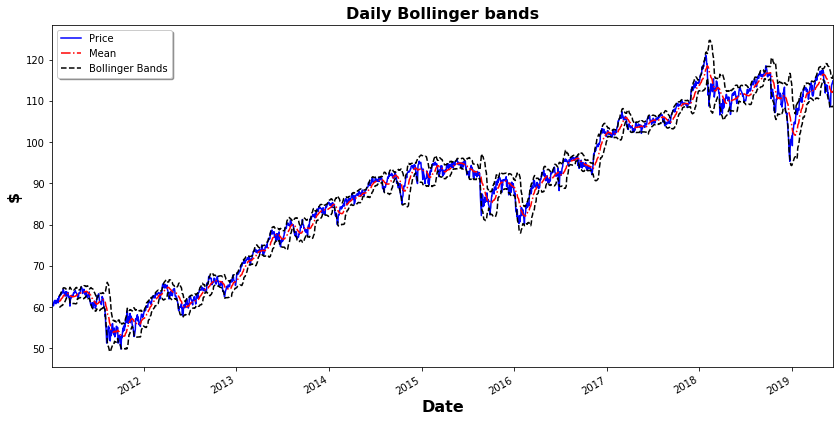

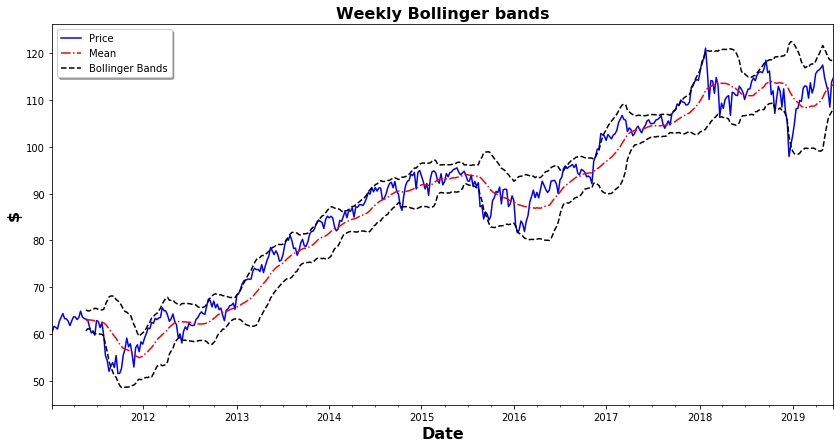

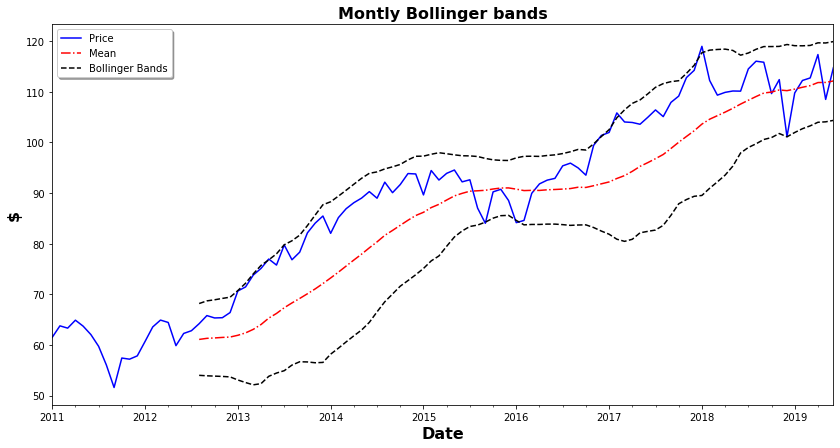

In [46]:
w_t_p = [
    cash_candles,
    daily_candles,
    weekly_candles,
    monthly_candles
]

titles = ['Cash', 'Daily', 'Weekly', 'Montly']

for i, j in zip(w_t_p, titles):
    cols = ['close', 'boll_mean', 'boll_sup', 'boll_inf']
    ax = i[cols].plot(style=['-b', '-.r', '--k', '--k'], figsize=(14, 7))
    formato = {'weight': 'bold', 'fontsize': 16}
    ax.set_title(j + ' Bollinger bands', **formato)
    ax.set_xlabel('Date', **formato)
    ax.set_ylabel('$', **formato)
    ax.legend(['Price', 'Mean', 'Bollinger Bands'], shadow=True)

**Notas:**
- El precio 'close' es el que actúa como indicador de cruce con las bandas de Bollinger.
- Distinguimos entre señales de compra/venta y entradas/salidas reales.
- Cuando da señal operamos al precio 'open' del día siguiente.
- No podemos realizar venta en corto.

In [49]:
def signal_boll(df, ref='close'):
    '''
    Calcula las senales de compra y venta de acuerdo
    a la directrices del enunciado.

    Inputs:
    ---------------
    df: pd.Dataframe
        Pandas dataframe con el precio de cierre.

    Returns:
    ---------------
    df: pd.Dataframe
        Dataframe de entrada con una nueva columna 'bos':
        (+1 -> compra, -1 -> venta)
    '''

    assert ref in df.columns, f'no {ref} in input'

    def _cruce(_df, col1, col2):
        side = np.sign((_df[col1] - _df[col2]).fillna(0).values)
        cruce = np.insert((side[1:] - side[:-1])/2, 0, 0)
        return cruce

    cruce_inf = _cruce(df, ref, 'boll_inf')
    cruce_sup = _cruce(df, 'boll_sup', ref)

    df['bos'] = 0

    idx_inf = cruce_inf == 1
    df['bos'].loc[idx_inf] = 1

    idx_sup = cruce_sup == 1
    df['bos'].loc[idx_sup] = -1

    return df

In [50]:
def stgy(df):
    '''
    Calcula las entradas y salidas reales segun la senal de compra/venta 'bos'

    Inputs:
    ---------------
    df: pd.Dataframe
        Pandas dataframe con la senal de compra/venta.

    Returns:
    ---------------
    df: pd.Dataframe
        Dataframe de entrada con una nueva columna 'in_out':
        (+1 -> compra real, -1 -> venta real)
    op: pd.Dataframe
        Dataframe con información de las negociaciones
    '''

    assert 'bos' in df.columns, 'no "bos" column in input'

    ndays = df.shape[0]
    in_out = 0
    num = -1

    dates = df.index.values
    df['in_out'] = np.nan
    cols = ['date open', 'buy price', 'date close', 'sell price']
    op = pd.DataFrame(columns=cols)

    for i in range(0, ndays-1):

        if df.bos[i] == 1 and in_out == 0:
            in_out = 1
            df['in_out'].iloc[i+1] = 1
            buy = {
                'date open': dates[i+1],
                'buy price': df['open'].iloc[i+1]
            }
            num += 1

        elif df.bos[i] == -1 and in_out == 1:
            in_out = 0
            df['in_out'].iloc[i+1] = -1
            sell = {
                'date close': dates[i+1],
                'sell price': df['open'].iloc[i+1]
            }
            op = op.append({**buy, **sell}, ignore_index=True)

    op['duration'] = (op['date close'] - op['date open']).dt.days
    op['return'] = (op['sell price']/op['buy price'] - 1) * 100
    op['anual'] = ((1 + op['return']/100)**(365/op['duration']) - 1) * 100
    # 365, no 252 porque medimos la duracion de los trades en dias naturales
    return df, op

Para calcular la estrategia definiendo los parámetros podemos definir la siguiente función

In [51]:
def full_stgy(sp, windows=20, resampling='B', cash=False, cash_num=1e5):

    if cash:
        _ = cash_ohlc(sp, cash_num)
    else:
        _ = sp.price.resample(resampling).ohlc().dropna()

    _ = bollinger(_, window=windows)
    _ = signal_boll(_)
    candles, op = stgy(_)

    return candles, op

In [52]:
daily_candles, op_daily = full_stgy(sp, windows=25)
cash_candles, op_cash = full_stgy(sp, windows=25, cash=True, cash_num=5e7)

C:\Users\franc\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Mostramos las negociaciones para la estrategia aplicada a los precios diarios y a los precios muestrados por efectivo.

In [53]:
op_daily

,date open,buy price,date close,sell price,duration,return,anual
0,2011-03-18,62.20,2011-05-03,64.48,46,3.665595,33.063059
1,2011-06-10,60.71,2011-07-11,61.90,31,1.960138,25.678605
2,2011-08-10,52.87,2011-10-31,59.09,82,11.764706,64.064543
3,2011-11-29,54.34,2012-03-21,65.51,113,20.555760,82.912891
4,2012-04-12,62.71,2012-09-18,66.92,159,6.713443,16.085979
5,2012-11-13,63.47,2012-12-20,66.86,37,5.341106,67.080195
6,2013-06-26,75.84,2013-07-15,79.26,19,4.509494,133.341464
7,2013-08-23,78.26,2013-09-20,81.10,28,3.628929,59.149776
8,2014-01-31,81.72,2014-04-07,86.81,66,6.228585,39.676352
9,2014-08-05,89.02,2015-05-20,95.60,288,7.391597,9.458768


In [54]:
op_cash

,date open,buy price,date close,sell price,duration,return,anual
0,2011-03-16 11:42:24,61.7636,2011-11-02 13:01:52,58.1790,231,-5.803742,-9.014765
1,2012-05-24 11:04:18,60.1500,2012-12-20 14:36:48,66.9800,210,11.354946,20.555098
2,2013-06-25 10:05:35,74.5600,2013-10-28 11:18:23,81.3600,125,9.120172,29.027629
3,2014-02-05 11:53:32,80.8300,2014-05-15 10:26:00,88.2100,98,9.130273,38.460747
4,2014-08-07 10:46:25,88.5904,2015-02-11 11:48:49,92.7200,188,4.661453,9.248576
5,2015-06-16 12:53:06,93.9600,2015-10-09 15:21:35,88.3208,115,-6.001703,-17.835319
6,2015-12-14 15:47:39,87.4400,2016-02-04 15:30:22,83.4000,51,-4.620311,-28.719833
7,2016-02-11 14:38:08,79.7700,2016-02-24 10:05:48,84.4200,12,5.829259,460.305740
8,2016-06-28 14:52:30,89.1200,2016-11-11 10:21:43,97.1000,135,8.954219,26.094714
9,2016-12-29 15:51:32,101.5600,2017-01-27 09:30:00,102.9600,28,1.378495,19.538635


Realizamos una figura de las estrategia.

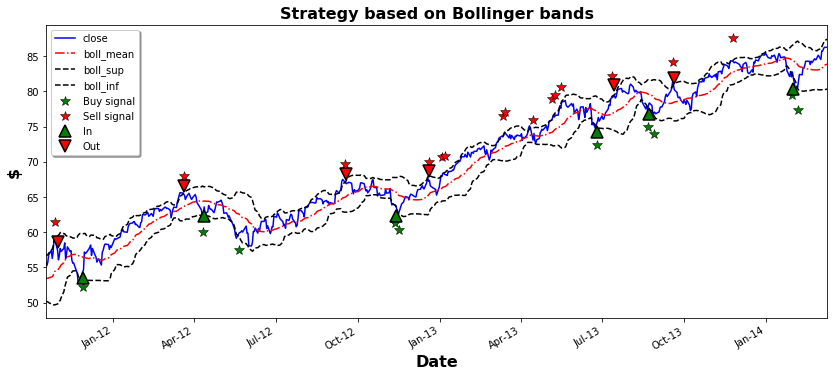

In [55]:
# daily_candles or cash_candles
data = daily_candles

# Para que se vea mejor seleccionamos una muestra de los datos
data = data.iloc[200:800, :]

cols = ['close', 'boll_mean', 'boll_sup', 'boll_inf']
ax = data[cols].plot(style=['-b', '-.r', '--k', '--k'],
                     label=['Price', 'Mean', 'Bollinger Bands'],
                     figsize=(14, 6))

formato = {'weight': 'bold', 'fontsize': 16}
ax.set_title('Strategy based on Bollinger bands', **formato)
ax.set_xlabel('Date', **formato)
ax.set_ylabel('$', **formato)

buy_signal = data.loc[data.bos == 1, 'close']
sell_signal = data.loc[data.bos == -1, 'close']
buy_in = data.loc[data.in_out == 1, 'close']
sell_out = data.loc[data.in_out == -1, 'close']

formato2 = {'ms': 10, 'mec': 'k', 'mew': 0.5}
buy_signal.multiply(0.96).plot(style='*g', **formato2, label='Buy signal')
sell_signal.multiply(1.04).plot(style='*r', **formato2, label='Sell signal')

formato2 = {'ms': 12, 'mec': 'k', 'mew': 1.5}
buy_in.multiply(0.98).plot(style='^g', **formato2, label="In")
sell_out.multiply(1.02).plot(style='vr', **formato2, label="Out")

ax.legend(shadow=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

El rendimiento así como el rendimiento anualizado de cada operación se puede consultar en el mismo dataframe.

In [56]:
op_daily

,date open,buy price,date close,sell price,duration,return,anual
0,2011-03-18,62.20,2011-05-03,64.48,46,3.665595,33.063059
1,2011-06-10,60.71,2011-07-11,61.90,31,1.960138,25.678605
2,2011-08-10,52.87,2011-10-31,59.09,82,11.764706,64.064543
3,2011-11-29,54.34,2012-03-21,65.51,113,20.555760,82.912891
4,2012-04-12,62.71,2012-09-18,66.92,159,6.713443,16.085979
5,2012-11-13,63.47,2012-12-20,66.86,37,5.341106,67.080195
6,2013-06-26,75.84,2013-07-15,79.26,19,4.509494,133.341464
7,2013-08-23,78.26,2013-09-20,81.10,28,3.628929,59.149776
8,2014-01-31,81.72,2014-04-07,86.81,66,6.228585,39.676352
9,2014-08-05,89.02,2015-05-20,95.60,288,7.391597,9.458768


In [57]:
op_cash

,date open,buy price,date close,sell price,duration,return,anual
0,2011-03-16 11:42:24,61.7636,2011-11-02 13:01:52,58.1790,231,-5.803742,-9.014765
1,2012-05-24 11:04:18,60.1500,2012-12-20 14:36:48,66.9800,210,11.354946,20.555098
2,2013-06-25 10:05:35,74.5600,2013-10-28 11:18:23,81.3600,125,9.120172,29.027629
3,2014-02-05 11:53:32,80.8300,2014-05-15 10:26:00,88.2100,98,9.130273,38.460747
4,2014-08-07 10:46:25,88.5904,2015-02-11 11:48:49,92.7200,188,4.661453,9.248576
5,2015-06-16 12:53:06,93.9600,2015-10-09 15:21:35,88.3208,115,-6.001703,-17.835319
6,2015-12-14 15:47:39,87.4400,2016-02-04 15:30:22,83.4000,51,-4.620311,-28.719833
7,2016-02-11 14:38:08,79.7700,2016-02-24 10:05:48,84.4200,12,5.829259,460.305740
8,2016-06-28 14:52:30,89.1200,2016-11-11 10:21:43,97.1000,135,8.954219,26.094714
9,2016-12-29 15:51:32,101.5600,2017-01-27 09:30:00,102.9600,28,1.378495,19.538635


In [58]:
print('Rendimiento de las operaciones basadas en los precios diarios')
_ = op_daily['return'].map(lambda x: print(f'Return {x:+6.2f}%'))
print('')
print('Rendimiento de las operaciones basadas en los precios \
muestreados por efectivo')
_ = op_cash['return'].map(lambda x: print(f'Return {x:+6.2f}%'))

Rendimiento de las operaciones basadas en los precios diarios
Return  +3.67%
Return  +1.96%
Return +11.76%
Return +20.56%
Return  +6.71%
Return  +5.34%
Return  +4.51%
Return  +3.63%
Return  +6.23%
Return  +7.39%
Return -10.52%
Return  +7.81%
Return  +1.58%
Return  +3.07%
Return  +3.51%
Return  +3.48%

Rendimiento de las operaciones basadas en los precios muestreados por efectivo
Return  -5.80%
Return +11.35%
Return  +9.12%
Return  +9.13%
Return  +4.66%
Return  -6.00%
Return  -4.62%
Return  +5.83%
Return  +8.95%
Return  +1.38%
Return  +0.37%
Return  +3.43%
Return  +1.51%
Return  +3.64%
Return  -0.57%
Return  +2.36%
Return  -5.97%
Return  -7.26%
Return  +3.59%


Si se invierte el mismo capital en cada operación, el retorno total es la suma de los retornos individuales.

Calculamos también el retorno anualizado considerando el tiempo transcurrido desde la primera compra a la última venta.

Mostramos el rendimiento de la estrategia aplicada a los precios diarios como a los muestreados por efectivo.

In [59]:
for op in [op_daily, op_cash]:

    total_return = op['return'].sum()

    duration = (op['date close'].iloc[-1] - op['date open'].iloc[1]).days
    anual_return = ((1 + total_return/100)**(365/duration) - 1) * 100

    print(f'{op.shape[0]} operaciones')
    print(f'{duration} dias transcurridos')
    print(f'{total_return:0.2f}% -> Retorno total de la estrategia')
    print(f'{anual_return:0.2f}% -> Retorno total anualizado')
    print('')

16 operaciones
2637 dias transcurridos
80.69% -> Retorno total de la estrategia
8.53% -> Retorno total anualizado

19 operaciones
2419 dias transcurridos
35.11% -> Retorno total de la estrategia
4.64% -> Retorno total anualizado

